MA0218 Exercise 3
=================

**Author:** Hankertrix




# Table of Contents







## Solutions



### Problem 1



Import the required libraries.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pathlib import Path

# Set the seaborn style for graphics
sb.set_theme()

Load the data.



In [2]:
house_data = pd.read_csv("train.csv")
print(house_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Extract the required numeric variables.



In [3]:
numeric_variables = ["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea", "SalePrice"]
house_numeric_data = pd.DataFrame(house_data[numeric_variables])
print(house_numeric_data)

      LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
0        8450       1710          856         548     208500
1        9600       1262         1262         460     181500
2       11250       1786          920         608     223500
3        9550       1717          756         642     140000
4       14260       2198         1145         836     250000
...       ...        ...          ...         ...        ...
1455     7917       1647          953         460     175000
1456    13175       2073         1542         500     210000
1457     9042       2340         1152         252     266500
1458     9717       1078         1078         240     142125
1459     9937       1256         1256         276     147500

[1460 rows x 5 columns]


#### (a)



Load the data descriptions.



In [4]:
data_descriptions = Path("data_description.txt").read_text()

Iterate over all the numeric variables and print the label descriptions and plot the distributions



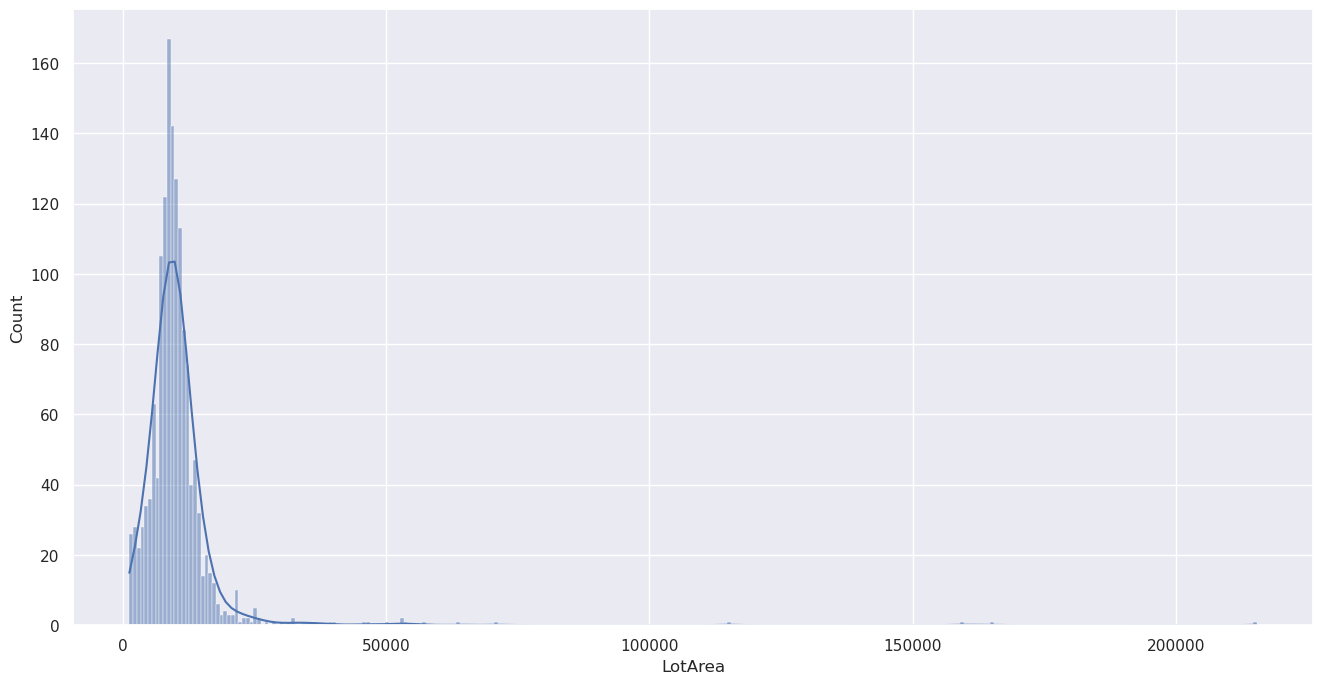

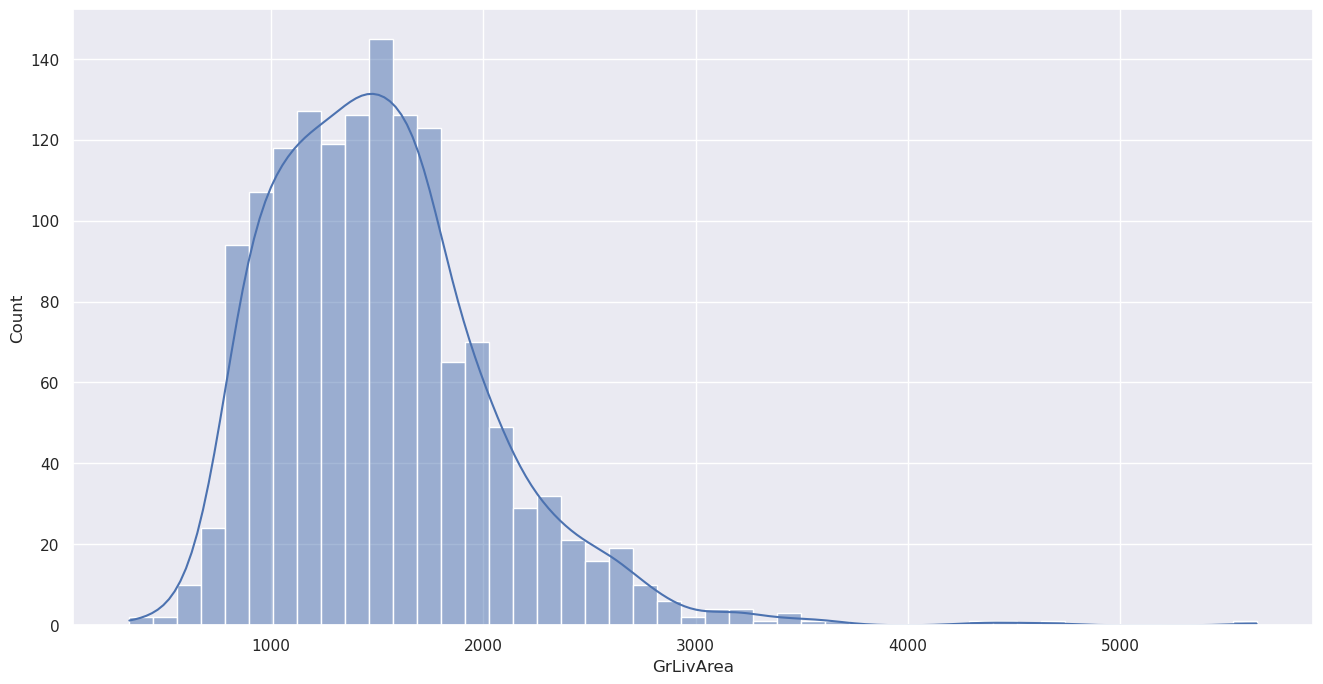

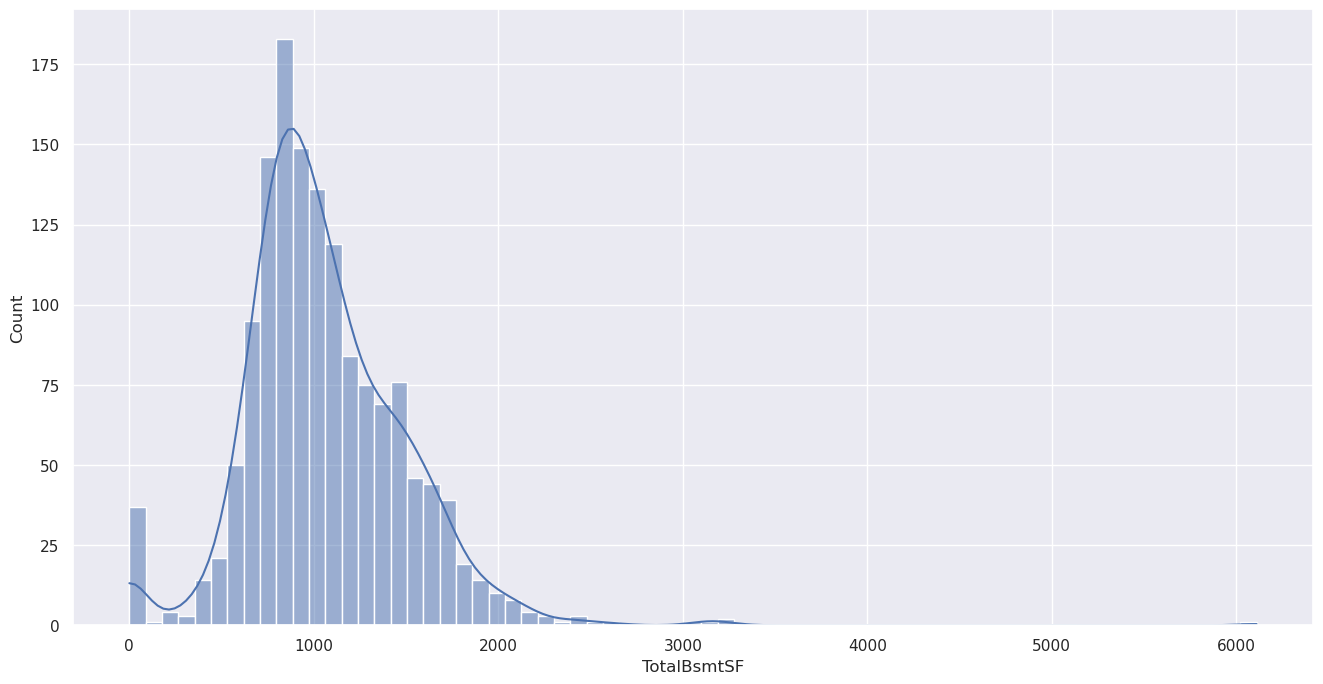

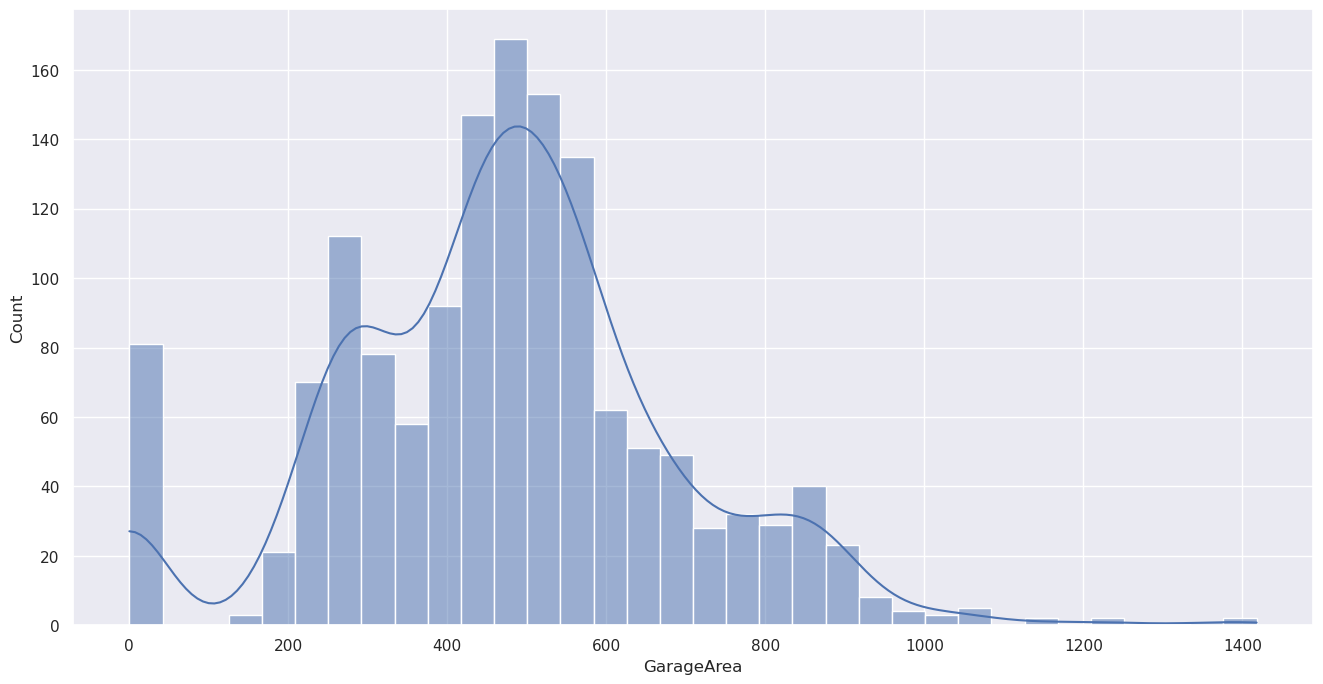

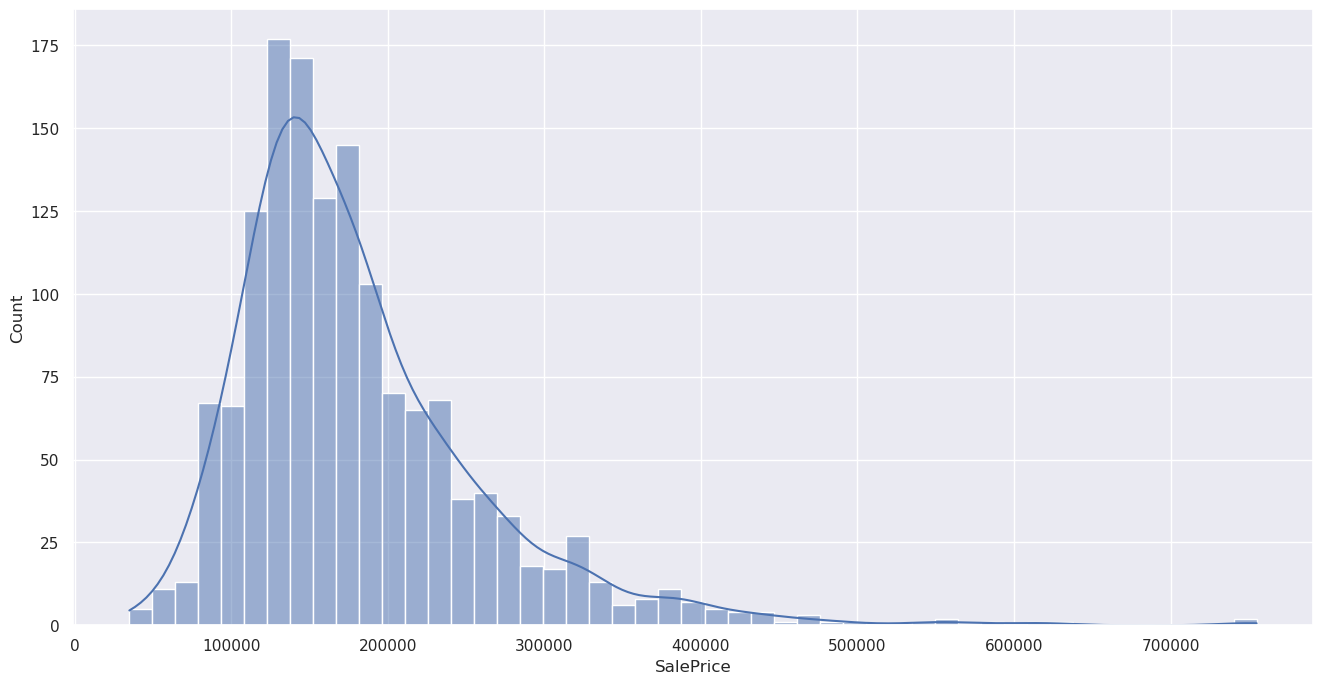

In [5]:
for variable in numeric_variables:
    figure = plt.figure(figsize=(16, 8))
    sb.histplot(data=house_numeric_data[variable], kde=True)

#### (b)



Most of the distributions look roughly normal, with a few exceptions, like for "GarageArea", which has multiple peaks. "LotArea" also has far more entries in one tiny range compared to the rest, so it is not close to a normal distribution.

Print the skew for all the distributions.



In [6]:
for variable in numeric_variables:
    print(f"{variable} skew: {house_numeric_data[variable].skew()}")

LotArea skew: 12.207687851233496
GrLivArea skew: 1.3665603560164552
TotalBsmtSF skew: 1.5242545490627664
GarageArea skew: 0.17998090674623907
SalePrice skew: 1.8828757597682129


From the skew data above, "LotArea" has the most number of outliers.



#### (c)



Print the correlation matrix.



In [7]:
correlation_matrix = house_numeric_data.corr()
print(correlation_matrix)

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


Plot the correlation matrix using a heat map.



<Axes: >

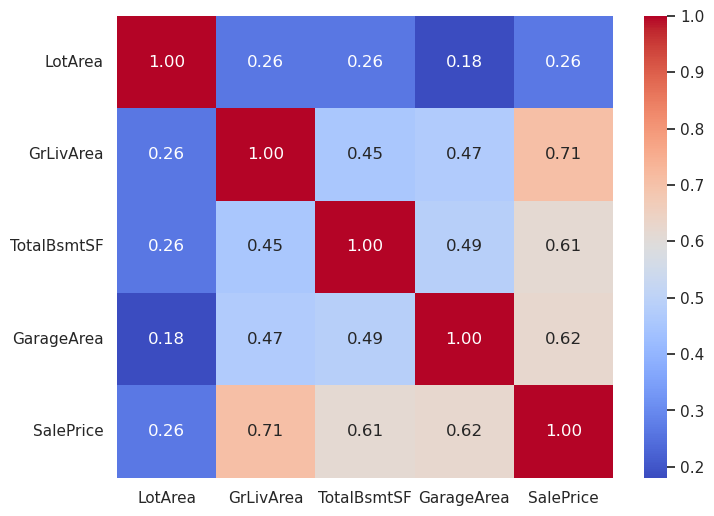

In [8]:
figure = plt.figure(figsize=(8, 6))
sb.heatmap(
    correlation_matrix,

    # Annotate the heatmap with numbers
    annot=True,

    # Use the cool warm colour map
    cmap="coolwarm",

    # Format the numbers to 2 decimal places
    fmt=".2f",

    # Show the colour bar
    cbar=True,
)

From the heatmap above, "GrLivArea" has the strongest correlation with "SalePrice". From the data description, "GrLivArea" means "Above grade (ground) living area square feet", so it would make sense that this variable is useful in predicting "SalePrice" as price is usually proportional to the area of the house being purchased.



#### (d)



Plot "SalePrice" against all the variables, except itself, of course.



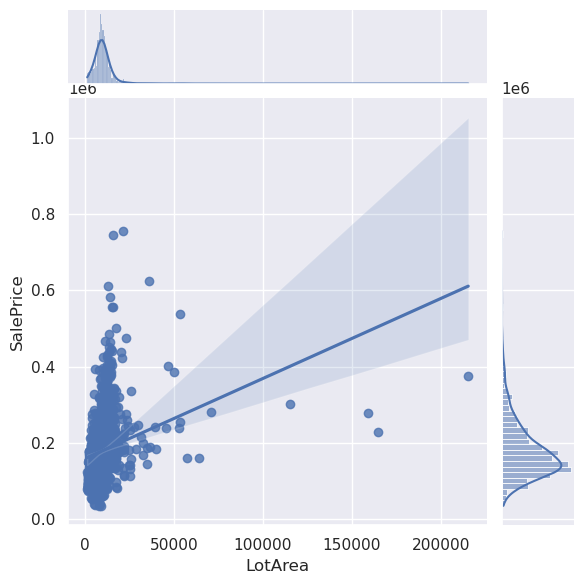

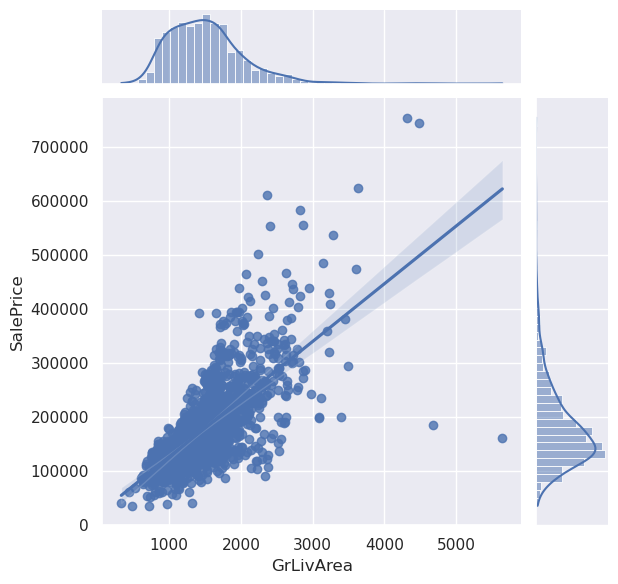

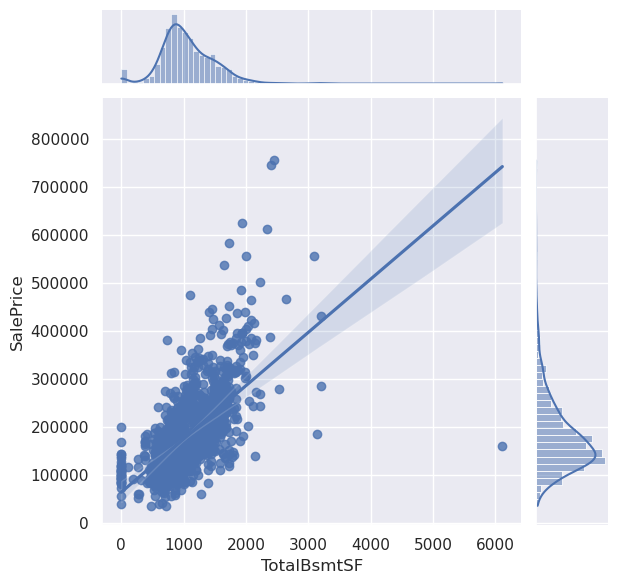

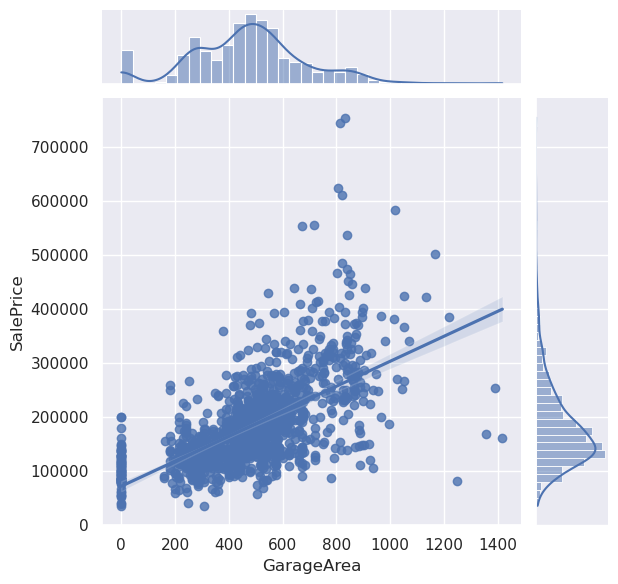

In [9]:
# Exclude the "SalePrice" variable with [:-1]
for variable in numeric_variables[:-1]:
    sb.jointplot(
        data=house_numeric_data,
        x=variable,
        y="SalePrice",

        # Add a linear regression to the plot
        kind="reg",
        height=6,
    )

Plot the pair plot of all the variables.



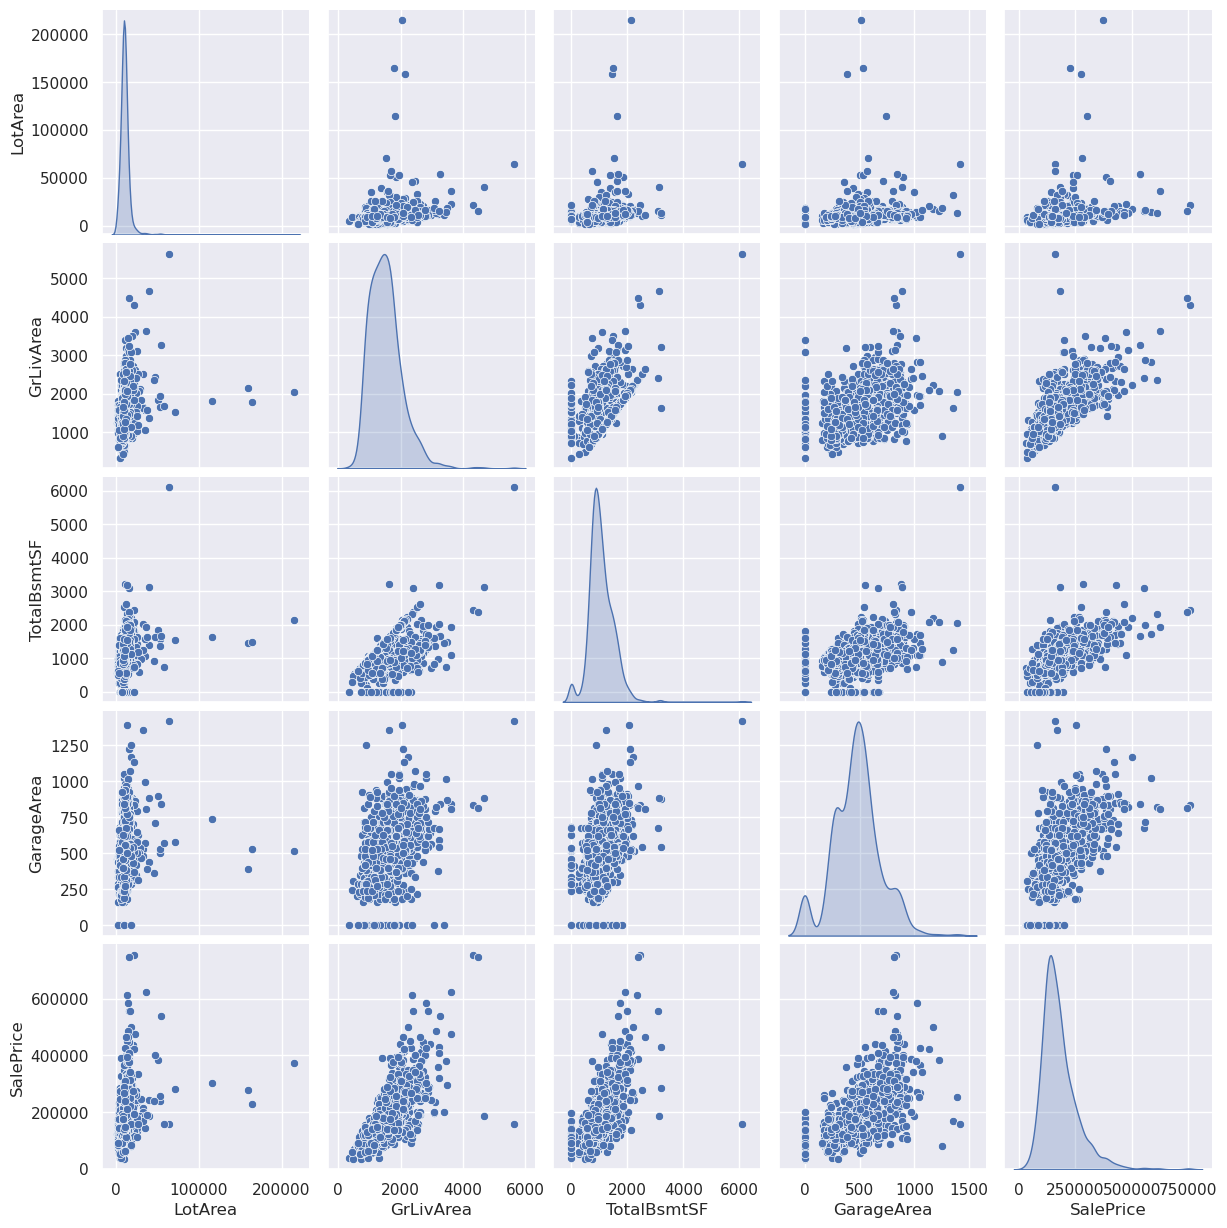

In [10]:
# Use the kernel density plot for the plots in the diagonal
sb.pairplot(data=house_numeric_data, diag_kind="kde")

"GrLivArea" has the strongest linear relationship with "SalePrice". As mentioned above, "GrLivArea" may be useful in predicting "SalePrice" as the sale price is usually proportional to the liveable area.



### Problem 2



#### (a)



Load the categorical data.



In [11]:
categorical_variables = ["MSSubClass", "Neighborhood", "BldgType", "OverallQual"]
house_categorical_data = house_data[categorical_variables]
print(house_categorical_data)

      MSSubClass Neighborhood BldgType  OverallQual
0             60      CollgCr     1Fam            7
1             20      Veenker     1Fam            6
2             60      CollgCr     1Fam            7
3             70      Crawfor     1Fam            7
4             60      NoRidge     1Fam            8
...          ...          ...      ...          ...
1455          60      Gilbert     1Fam            6
1456          20       NWAmes     1Fam            6
1457          70      Crawfor     1Fam            7
1458          20        NAmes     1Fam            5
1459          20      Edwards     1Fam            5

[1460 rows x 4 columns]


Convert the data type to "category".



In [12]:
house_categorical_data = house_categorical_data.astype("category")
print(house_categorical_data.dtypes)

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object


#### (b)



Print the statistical description of the data.



In [13]:
print(house_categorical_data.describe())

        MSSubClass Neighborhood BldgType  OverallQual
count         1460         1460     1460         1460
unique          15           25        5           10
top             20        NAmes     1Fam            5
freq           536          225     1220          397


Iterate over all the categorical variables and plot the category plots.



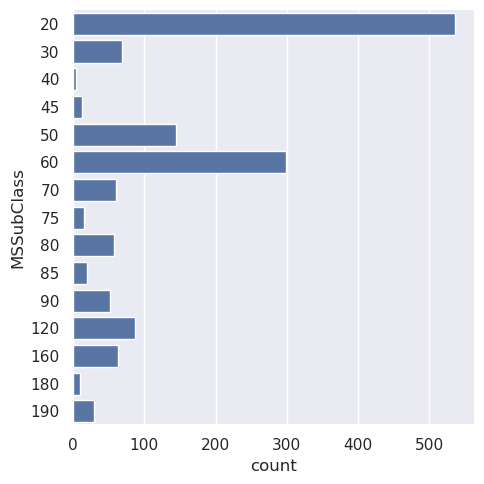

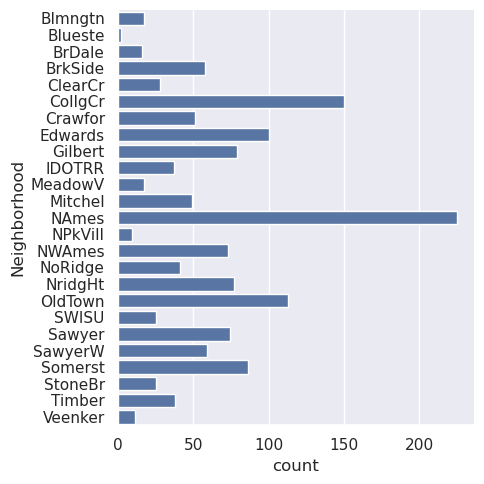

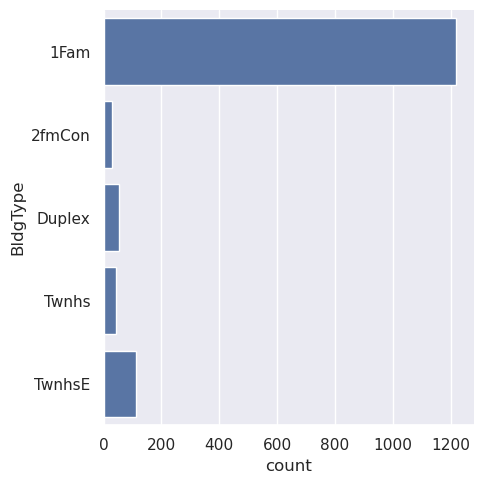

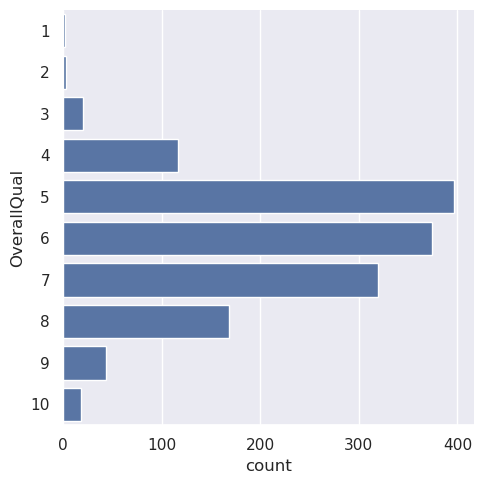

In [14]:
for category in categorical_variables:

    # Plot a count plot of the categorical variable
    sb.catplot(house_categorical_data[category], kind="count")

#### (c)



Print the joint heatmap for "OverallQual" against all variables except for "OverallQual".



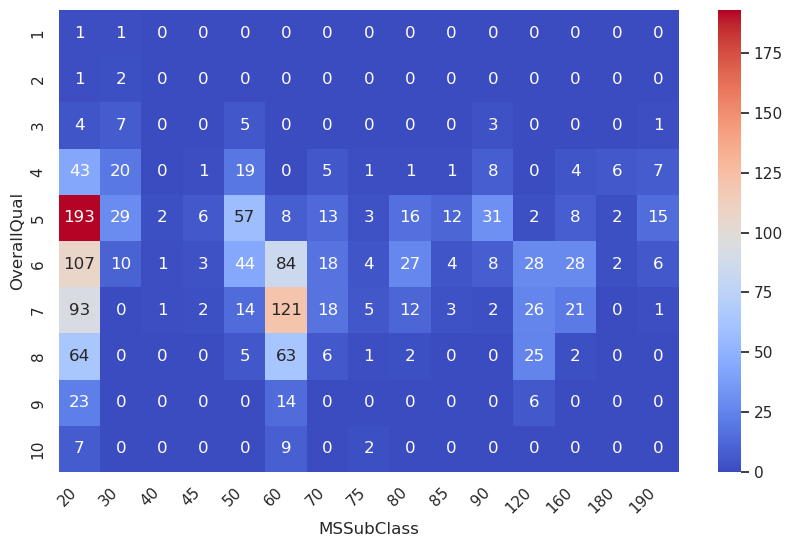

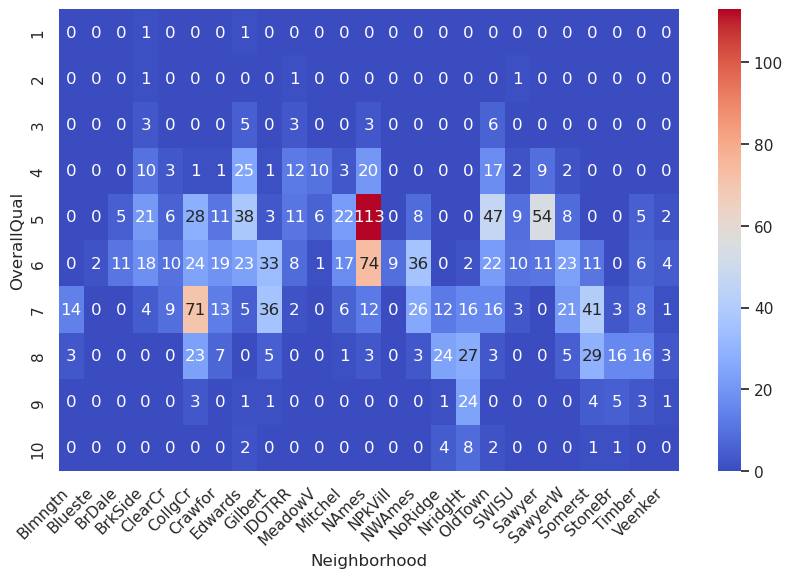

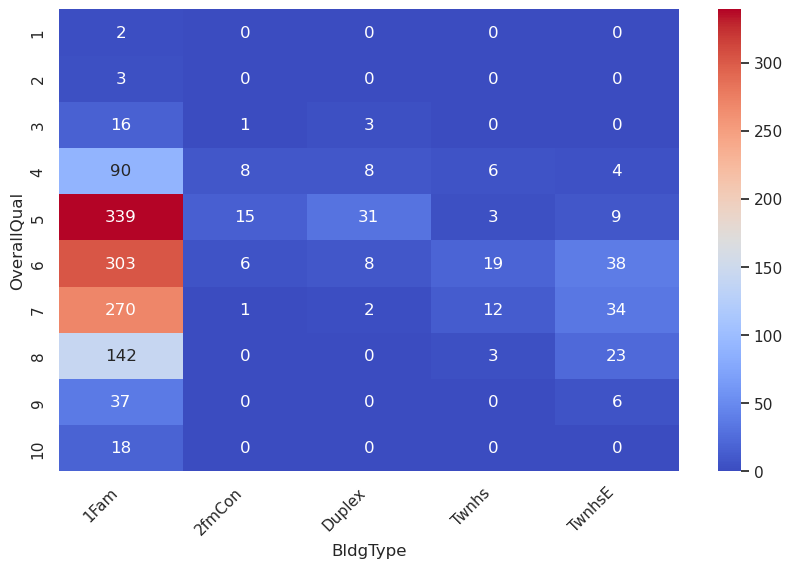

In [15]:
# Exclude the "OverallQual" variable with [:-1]
for category in categorical_variables[:-1]:

    # The groupby function doesn't do anything
    # until a function is called on it,
    # so we need to call the size function on the
    # groupby object compute the group sizes and
    # get the new data frame.
    grouped_data = house_categorical_data.groupby(
        by=["OverallQual", category], observed=False
    ).size()

    # Unstack the data, so that each individual
    # category has a 2D numpy array that seaborn
    # can plot on the heatmap
    grouped_data = grouped_data.unstack()

    # Create the figure to plot on
    figure = plt.figure(figsize=(10, 6))

    # Plot the heatmap
    sb.heatmap(
        grouped_data,

        # Annotate the data
        annot=True,

        # Format the numbers as decimals
        fmt="d",

        # Use the cool warm colour map
        cmap="coolwarm",

        # Draw a colour bar
        cbar=True,
    )

    # Rotate the x-axis labels by 45 degrees to the right
    plt.xticks(rotation=45, ha="right")

The heatmaps aren't very useful for identifying the relation between "OverallQual" and the variables, as the only visualise categories with sufficient data. A lot of categories in the data is missing the "OverallQual" data point, so the heatmaps are only useful for 1 or 2 categories with sufficient data, but are otherwise unhelpful.



#### (d)



Iterate over all the variables and draw box plots for each of them.



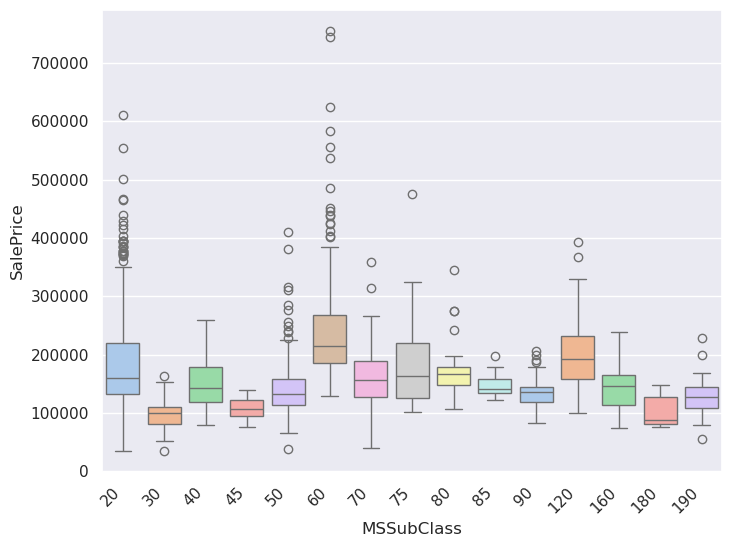

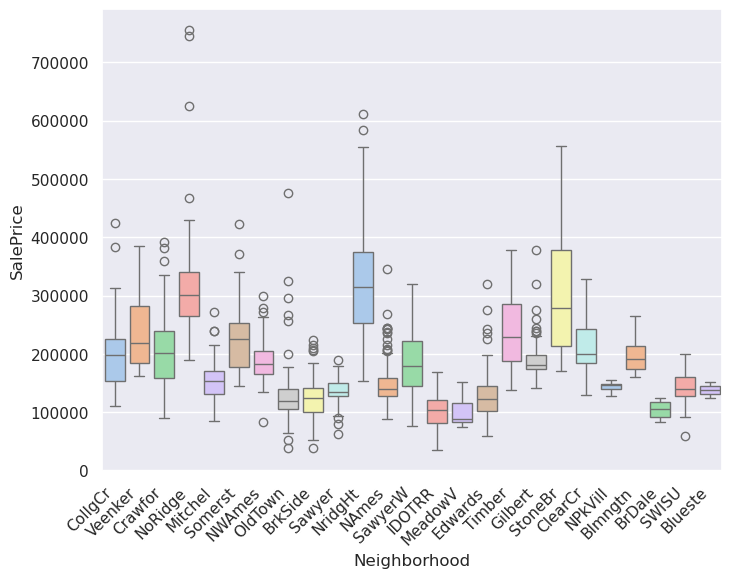

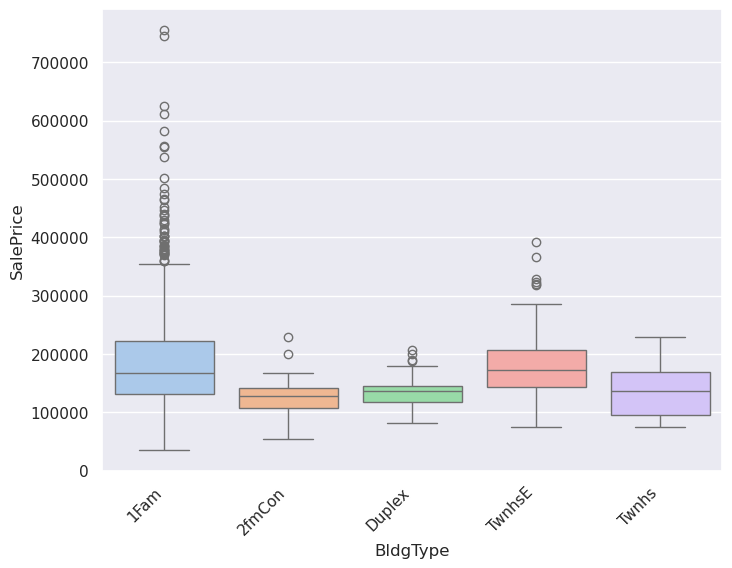

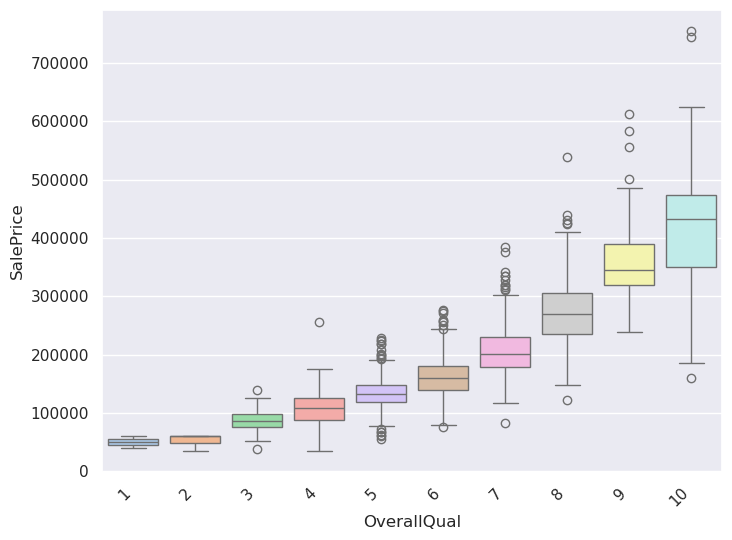

In [16]:
for category in categorical_variables:
    figure = plt.figure(figsize=(8, 6))

    # Plot the box plot
    sb.boxplot(
        data=house_data,
        x=category,
        y="SalePrice",

        # Set the hue to the category
        # to colour it
        hue=category,

        # Use the pastel colour palette
        palette="pastel",
    )

    # Rotate the x-axis labels 45 degrees to the right
    plt.xticks(rotation=45, ha="right")

    # Remove the legend
    plt.legend([], [], frameon=False)

The sale price is most influenced by the overall quality, as there is a clear correlation between higher overall quality and higher sale prices. The "MSSubClass" and "Neighborhood" also seem to affect the sale price, but to a lesser extent, with "Neighborhood" having a stronger correlation than "MSSubClass".

